In [2]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
import numpy as np
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 

data_folder = 'DataAnalysisFootball/data/'

In [4]:
#Matches select
stmt = """SELECT  Teams.FullName as HomeTeam, Teams2.FullName as AwayTeam, 
        Teams.ExternalId as HomeTeamId, Teams2.ExternalId as AwayTeamId
	  ,[Matches].ExternalId as ExternalId
      ,[Date]
      ,[Country]
      ,[League]
      ,[Season]
      ,[Stage]
      ,[AwayTeam_Id]
      ,[HomeTeam_Id]
FROM  [FootballData].[dbo].[Matches]
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id"""
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
df_matches.drop_duplicates(['ExternalId'], inplace=True)
df_matches['Date']=pd.to_datetime(df_matches['Date'])
print(df_matches.shape)
df_matches.head(10)

(7410, 12)


,HomeTeam,AwayTeam,HomeTeamId,AwayTeamId,ExternalId,Date,Country,League,Season,Stage,AwayTeam_Id,HomeTeam_Id
0,Leicester,Everton,8197,8668,1723984,2014-08-18 15:00:00,England,Premier League,2014/2015,1,13,9
1,Burnley,Chelsea,8191,8455,1723983,2014-08-18 15:00:00,England,Premier League,2014/2015,1,14,10
2,Liverpool,Southampton,8650,8466,1723985,2014-08-18 15:00:00,England,Premier League,2014/2015,1,15,12
3,Arsenal,Crystal Palace,9825,9826,1723982,2014-08-18 15:00:00,England,Premier League,2014/2015,1,16,11
4,Manchester United,Swansea,10260,10003,1723986,2014-08-18 15:00:00,England,Premier League,2014/2015,1,26,25
5,Newcastle United,Manchester City,10261,8456,1723987,2014-08-18 15:00:00,England,Premier League,2014/2015,1,28,27
6,Stoke,Aston Villa,10194,10252,1723989,2014-08-18 15:00:00,England,Premier League,2014/2015,1,34,33
7,Queens Park Rangers,Hull,10172,8667,1723988,2014-08-18 15:00:00,England,Premier League,2014/2015,1,36,35
8,West Bromwich Albion,Sunderland,8659,8472,1723990,2014-08-18 15:00:00,England,Premier League,2014/2015,1,38,37
9,West Ham,Tottenham,8654,8586,1723991,2014-08-18 15:00:00,England,Premier League,2014/2015,1,40,39


In [6]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.drop_duplicates(['ExternalId'], inplace=True)
df_corners.head(2)

(74292, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
0,1,3647429,1723982,15,37436,9825
1,2,3649357,1723985,9,30618,8650


In [7]:
#Shots on select
stmt = "SELECT * FROM ShotOns"
# Excute Query here
df_shots_on = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_on.shape)
df_shots_on.drop_duplicates(['ExternalId'], inplace=True)

#Shots off select
stmt = "SELECT * FROM ShotOffs"
# Excute Query here
df_shots_off = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_off.shape)
df_shots_off.drop_duplicates(['ExternalId'], inplace=True)

#Possessions select
stmt = "SELECT * FROM Possessions"
# Excute Query here
df_possessions = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_possessions.shape)
df_possessions.drop_duplicates(['ExternalId'], inplace=True)
df_possessions.replace('', np.nan, inplace=True)
df_possessions.dropna(axis=0, how='any', inplace=True)

df_possessions['HomePossession'] = df_possessions['HomePossession'].astype(int)
df_possessions['AwayPossession'] = df_possessions['AwayPossession'].astype(int)
df_possessions['Minute'] = df_possessions['Minute'].astype(int)
#df_possessions['TeamId'] = df_possessions['TeamId'].astype(str)
df_possessions.head()


(79636, 6)
(78744, 6)
(91598, 7)


,Id,ExternalId,MatchId,Minute,HomePossession,AwayPossession,TeamId
0,1,3645948,1723984,23,39,61,0
1,2,3652653,1723983,23,35,65,0
2,3,3646197,1723984,44,36,64,0
3,4,3652713,1723983,44,35,65,0
4,5,3646619,1723984,69,37,63,0


In [8]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.drop('Id', inplace=True, axis=1)
df_goals.drop_duplicates(inplace=True)
print(df_goals.shape)

(21150, 8)
(21013, 7)


In [9]:
#Teams select
stmt = "SELECT * FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
df_teams.head(2)
#df_teams.count

(15047, 4)


,Id,ExternalId,FullName,Acronym
0,1,9825,Arsenal,ARS
1,2,8650,Liverpool,LIV


(11119, 3)
10003


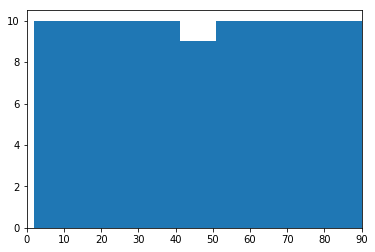

10167


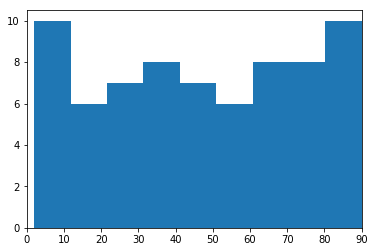

10172


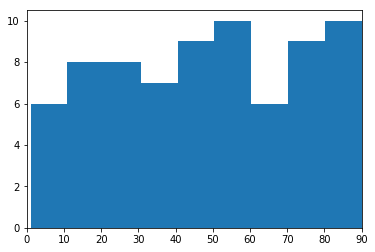

10189


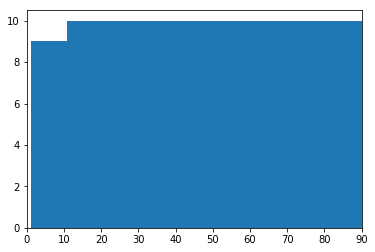

10194


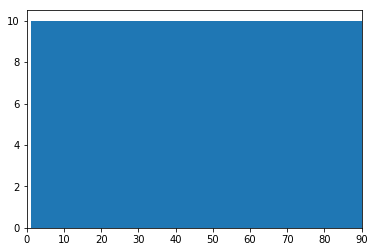

10204


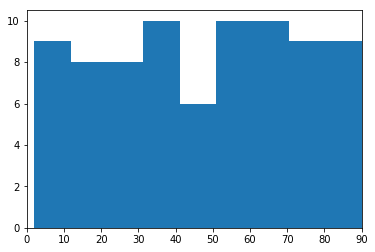

10205


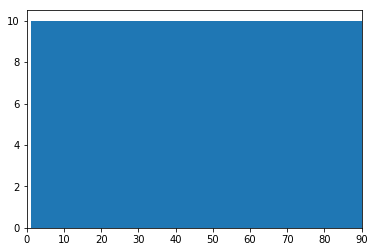

10233


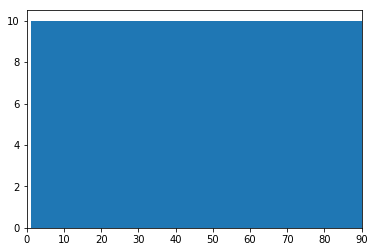

10242


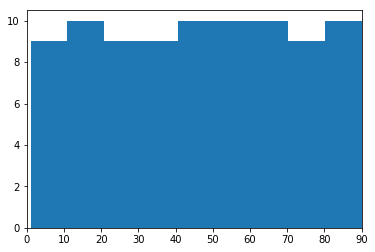

10249


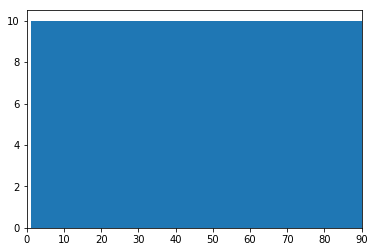

10252


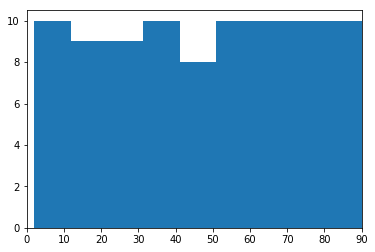

10260


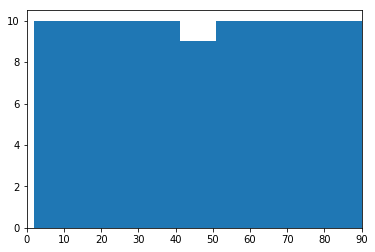

10261


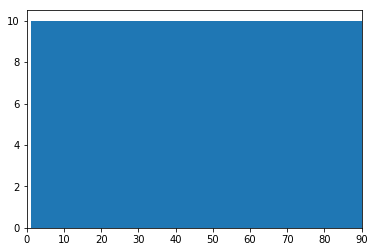

10267


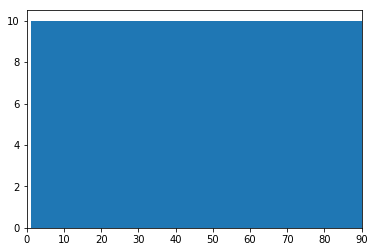

10268


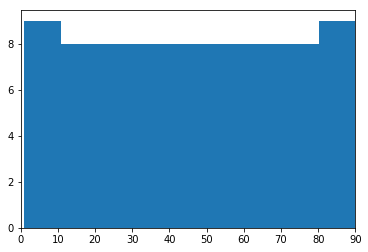

10269


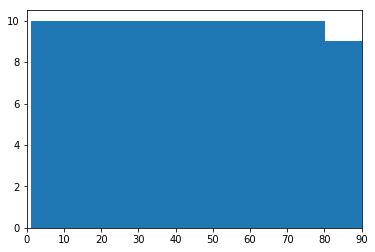

10281


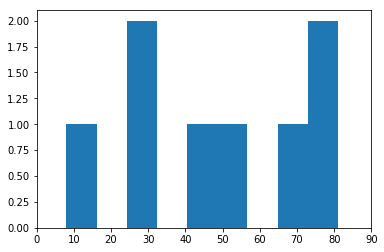

178475


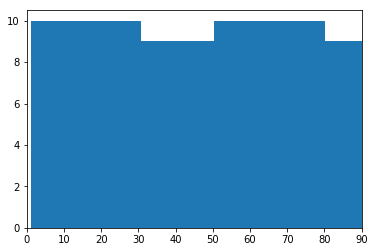

208931


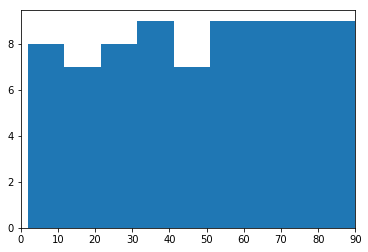

4087


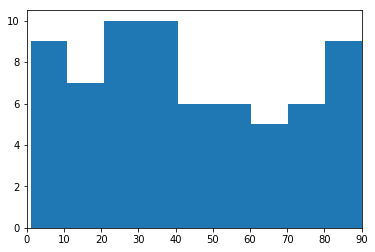

6266


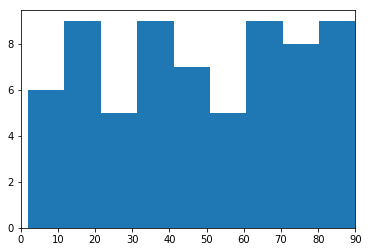

6391


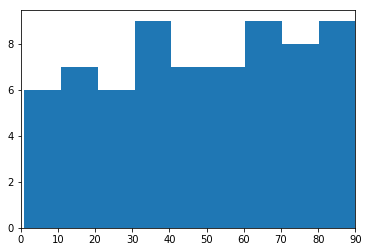

6394


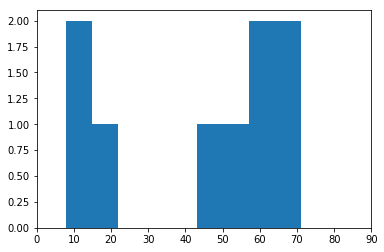

674792


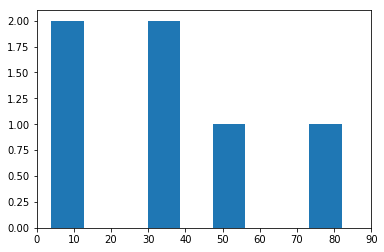

7732


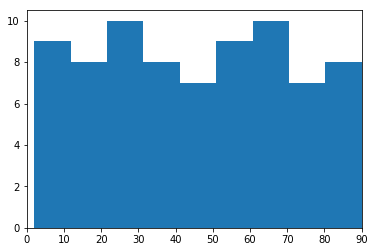

7794


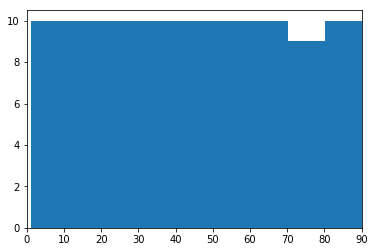

7819


KeyboardInterrupt: 

In [10]:
#Teams select
stmt = """SELECT  TeamId, convert (bigint, minute  ) as Minute, count(*) as count
  FROM [FootballData].[dbo].[Corners]
  group by convert (bigint, minute  ),TeamId
  order by 1,2"""
# Excute Query here
df_teams_corners_per_minute = pd.read_sql(stmt,conn)
print(df_teams_corners_per_minute.shape)
#df_teams_corners_per_minute.head()
groups = df_teams_corners_per_minute.groupby(['TeamId'])
df_teams_corners_per_minute.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].TeamId.values[0])
    plt.hist(group[1].Minute, bins=9)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   
#hist = df_teams_corners_per_minute.hist(by='Minute')
##
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])
  

#for group in df_teams_corners_per_minute.groupby(['TeamId']).groups:

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# df_teams_corners_per_minute.plot.hist()
# plt.show()
# plt.hist(df_teams_corners_per_minute, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()
# for team in df_teams_corners_per_minute.groupby(['TeamId']).groups.values:
#     team.hist()

In [152]:
#hist = df_corners.groupby(['Minute','TeamId']).head(10).hist(color='k', alpha=0.5, bins=3)
#not working

In [11]:
goals = pd.merge(df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"),  how='left')
#result = goals[goals['Minute'].notnull()]
print(goals.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

for number in range(0, 90, 10):
    from_minute = number
    to_minute = number + 10
    goals_by_minute = premier_league.groupby(['TeamId'])['Minute'].apply(
        lambda x: len(x.where(
            lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
    #print(goals)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
       # print(goals)
#goals_teams = goa
#len(teams.groups)
premier_league.head(2)

MergeError: No common columns to perform merge on

In [40]:
result = pd.merge(df_matches.set_index("ExternalId"), df_corners.set_index("MatchId"),  how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
#print(result.shape)


#teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

#goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team.rename(columns={'FullName': 'FullNameHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
#goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team
result.head(2)
#goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

MergeError: No common columns to perform merge on

In [ ]:
goals = pd.merge( df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head(2)

#premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

#premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

In [53]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)['Minute']
#minutes_sum.last()
minutes_sum.first()

#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

MatchId  TeamId
1709697  9837      22
         9847       7
1709698  7794       9
         8592      12
1709699  7819      12
1709700  9853      39
1709702  9748      64
1709703  8689      10
         9829      78
1709704  9827      17
1709705  9830      65
1709706  9831      23
         9941      45
1709707  9827      48
         9829      45
1709708  8639      69
1709709  9747      90
1709711  10249     19
         8592      72
1709712  8550      12
         9830       3
1709713  9847      26
1709714  4087      35
         9851       7
1709715  9853      27
1709716  9748      76
         9941      10
1709717  7794      24
1709719  8592      46
1709720  8639      58
                   ..
2844469  8633      39
2844470  8558      62
2844471  9906      63
2844473  8305      18
2846841  8524      14
2846842  8547      71
2846843  8533      38
         9885       3
2846844  8534      14
2846845  8543      25
         9875      45
2846847  674792    43
         8600      65
2846848  7943   

In [13]:
def get_last_matches(date, team, x = 10):
    ''' Get the last x matches of a given team. '''
    
    #Filter team matches from matches
    team_matches = df_matches[(df_matches['HomeTeam'] == team) | (df_matches['AwayTeam'] == team)].drop_duplicates(['ExternalId'])
    team_matches['ExternalId'] = team_matches['ExternalId'].astype(int)
    #Filter x last matches from team matches
    last_matches = team_matches[team_matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[0:x,:]

    #Return last matches
    return last_matches

last_matches = get_last_matches("2018-08-27 15:00:00", "Arsenal")
last_matches.head()


,HomeTeam,AwayTeam,HomeTeamId,AwayTeamId,ExternalId,Date,Country,League,Season,Stage,AwayTeam_Id,HomeTeam_Id
1533,Chelsea,Arsenal,8455,9825,2781967,2018-08-18 12:30:00,England,Premier League,2018/2019,2,3096,3097
1521,Arsenal,Manchester City,9825,8456,2781950,2018-08-18 12:30:00,England,Premier League,2018/2019,1,3071,3072
1452,Huddersfield,Arsenal,9796,9825,2523115,2018-05-13 10:00:00,England,Premier League,2017/2018,38,2931,2932
1383,Leicester,Arsenal,8197,9825,2523046,2018-05-10 14:45:00,England,Premier League,2017/2018,31,2793,2794
1440,Arsenal,Burnley,9825,8191,2523103,2018-05-10 14:45:00,England,Premier League,2017/2018,37,2907,2908


In [19]:
def get_full_name(name):
    name_dict = {
        "Man United" : "Manchester United",
        "Man City" : "Manchester City",
        "Wolves" : "Wolverhampton Wanderers",
        "Newcastle" : "Newcastle United",
        "West Brom" : "West Bromwich Albion",
        "QPR" : "Queens Park Rangers",
    }
    if name in name_dict:
        return name_dict[name]
    return name
    
def get_match_features(match, x = 10):
    ''' Create match specific features for a given match. '''
    
    #Define variables
    date = match.Date
    home_team = get_full_name(match.HomeTeam)
    away_team = get_full_name(match.AwayTeam)
    print(date)
    #Get last x matches of home and away team
    matches_home_team = get_last_matches(date, home_team, x = 10)
    matches_away_team = get_last_matches(date, away_team, x = 10)
    
    goals_for_home = goals_against_home = corners_for_home = corners_against_home = shotson_for_home = shotson_against_home = shotsoff_for_home = shotsoff_against_home = 0
    
    for index, row in matches_home_team.iterrows():
        isHome = True if  row['HomeTeam'] == home_team else False
        teamId = row['HomeTeamId'] if isHome else row['AwayTeamId']
        teamAgainstId = row['HomeTeamId'] if not isHome else row['AwayTeamId']

        match_goals_for = df_goals[(df_goals['TeamId'] == teamId) & (df_goals['MatchId'] == row['ExternalId'])]
        goals_for_home += match_goals_for.shape[0]
        
        match_goals_against = df_goals[(df_goals['TeamId'] == teamAgainstId) & (df_goals['MatchId'] == row['ExternalId'])]
        goals_against_home += match_goals_against.shape[0]
        
        match_corners_for = df_corners[(df_corners['TeamId'] == teamId) & (df_corners['MatchId'] == row['ExternalId'])]
        corners_for_home += match_corners_for.shape[0]
        
        match_corners_against = df_corners[(df_corners['TeamId'] == teamAgainstId) & (df_corners['MatchId'] == row['ExternalId'])]
        corners_against_home += match_corners_against.shape[0]
        
        match_shotson_for = df_shots_on[(df_shots_on['TeamId'] == teamId) & (df_shots_on['MatchId'] == row['ExternalId'])]
        shotson_for_home += match_shotson_for.shape[0]
        
        match_shotson_against = df_shots_on[(df_shots_on['TeamId'] == teamAgainstId) & (df_shots_on['MatchId'] == row['ExternalId'])]
        shotson_against_home += match_shotson_against.shape[0]
        
        match_shotsoff_for = df_shots_off[(df_shots_off['TeamId'] == teamId) & (df_shots_off['MatchId'] == row['ExternalId'])]
        shotsoff_for_home += match_shotson_for.shape[0]
        
        match_shotsoff_against = df_shots_off[(df_shots_off['TeamId'] == teamAgainstId) & (df_shots_off['MatchId'] == row['ExternalId'])]
        shotsoff_against_home += match_shotson_against.shape[0]
        
        match_possession_for = df_possessions[(df_possessions['MatchId'] == row['ExternalId'])]['HomePossession']
        match_possession_against = df_possessions[(df_possessions['MatchId'] == row['ExternalId'])]['AwayPossession']
        
    goals_for_away = goals_against_away = corners_for_away = corners_against_away = shotson_for_away = shotson_against_away = shotsoff_for_away = shotsoff_against_away = 0
    for index, row in matches_away_team.iterrows():
        isHome = True if  row['HomeTeam'] == away_team else False
        teamId = row['HomeTeamId'] if isHome else row['AwayTeamId']
        teamAgainstId = row['HomeTeamId'] if not isHome else row['AwayTeamId']

        match_goals_for = df_goals[(df_goals['TeamId'] == teamId) & (df_goals['MatchId'] == row['ExternalId'])]
        goals_for_away += match_goals_for.shape[0]
        
        match_goals_against = df_goals[(df_goals['TeamId'] == teamAgainstId) & (df_goals['MatchId'] == row['ExternalId'])]
        goals_against_away += match_goals_against.shape[0]
        
        match_corners_for = df_corners[(df_corners['TeamId'] == teamId) & (df_corners['MatchId'] == row['ExternalId'])]
        corners_for_away += match_corners_for.shape[0]
        
        match_corners_against = df_corners[(df_corners['TeamId'] == teamAgainstId) & (df_corners['MatchId'] == row['ExternalId'])]
        corners_against_away += match_corners_against.shape[0]
        
        match_shotson_for = df_shots_on[(df_shots_on['TeamId'] == teamId) & (df_shots_on['MatchId'] == row['ExternalId'])]
        shotson_for_away += match_shotson_for.shape[0]
        
        match_shotson_against = df_shots_on[(df_shots_on['TeamId'] == teamAgainstId) & (df_shots_on['MatchId'] == row['ExternalId'])]
        shotson_against_away += match_shotson_against.shape[0]
        
        match_shotsoff_for = df_shots_off[(df_shots_off['TeamId'] == teamId) & (df_shots_off['MatchId'] == row['ExternalId'])]
        shotsoff_for_away += match_shotson_for.shape[0]
        
        match_shotsoff_against = df_shots_off[(df_shots_off['TeamId'] == teamAgainstId) & (df_shots_off['MatchId'] == row['ExternalId'])]
        shotsoff_against_away += match_shotson_against.shape[0]
        
        match_possession_for = df_possessions[(df_possessions['MatchId'] == row['ExternalId'])]['HomePossession']
        match_possession_against = df_possessions[(df_possessions['MatchId'] == row['ExternalId'])]['AwayPossession']
    
        #print("for " + str(match_goals_for.shape[0]))
        #print("against " +  str(match_goals_against.shape[0]))

        #print("for " + str(np.mean(match_possession_for)))
        #print("against " +  str(np.mean(match_possession_against)))
#     #Get last x matches of both teams against each other
#     last_matches_against = get_last_matches_against_eachother(matches, date, home_team, away_team, x = 3)
    
    result = pd.DataFrame()
    
   # result.loc[0, 'match_api_id'] = match.match_api_id
    result.loc[0, 'league_id'] = match.Div

#     #Create match features
    result.loc[0, 'home_team_goals_for'] = goals_for_home
    result.loc[0, 'home_team_goals_against'] = goals_against_home
    
    result.loc[0, 'home_team_corners_for'] = corners_for_home
    result.loc[0, 'home_team_corners_against'] = corners_against_home
    
    result.loc[0, 'home_team_shotson_for'] = shotson_for_home
    result.loc[0, 'home_team_shotson_against'] = shotson_against_home
    
    result.loc[0, 'home_team_shotsoff_for'] = shotsoff_for_home
    result.loc[0, 'home_team_shotsoff_against'] = shotsoff_against_home
    
    result.loc[0, 'away_team_goals_for'] = goals_for_away
    result.loc[0, 'away_team_goals_against'] = goals_against_away
    
    result.loc[0, 'away_team_corners_for'] = corners_for_away
    result.loc[0, 'away_team_corners_against'] = corners_against_away
    
    result.loc[0, 'away_team_shotson_for'] = shotson_for_away
    result.loc[0, 'away_team_shotson_against'] = shotson_against_away
    
    result.loc[0, 'away_team_shotsoff_for'] = shotsoff_for_away
    result.loc[0, 'away_team_shotsoff_against'] = shotsoff_against_away
#     result.loc[0, 'away_team_goals_difference'] = away_goals - away_goals_conceided
#     result.loc[0, 'games_won_home_team'] = get_wins(matches_home_team, home_team) 
#     result.loc[0, 'games_won_away_team'] = get_wins(matches_away_team, away_team)
#     result.loc[0, 'games_against_won'] = get_wins(last_matches_against, home_team)
#     result.loc[0, 'games_against_lost'] = get_wins(last_matches_against, away_team)
    
    #Return match features
    return result.iloc[0]

In [ ]:
import pandas as pd
from random import random
import numpy as np

#player=pd.read_csv('data/player_stats.csv')
#player['birthday']=pd.to_datetime(player['birthday'])
#files=[2014,2015,2016,2017,2018]
files=[2016,2017,2018]

missing=[]    
alldata=[]

for f in files:
    matches_with_odds = pd.read_csv(data_folder + str(f)+'.csv')
    #keep only completed games
    matches_with_odds['Date']=pd.to_datetime(matches_with_odds['Date'])
    
    #turn surface to lowrcase
    
    match_stats = matches_with_odds.apply(lambda x: get_match_features(x, x = 10), axis = 1)
    alldata.append(pd.concat([matches_with_odds, match_stats], axis=1))

#match_stats_and_odds.head(30)
#match_stats_and_odds.shape
data=pd.concat(alldata,axis=0)
data['IsTraining'] = True
data.to_csv(data_folder + '/data.csv',index=False)

In [24]:
matches_to_predict = pd.read_csv(data_folder + 'to_predict.csv')
matches_to_predict['Date']=pd.to_datetime(matches_to_predict['Date'])
matches_to_predict_with_stats = matches_to_predict.apply(lambda x: get_match_features(x, x = 10), axis = 1)
alldata = []
alldata.append(pd.concat([matches_to_predict, matches_to_predict_with_stats], axis=1))
data=pd.concat(alldata,axis=0)
data['IsTraining'] = False

previous_data = pd.read_csv(data_folder + '/data.csv')
data = previous_data.append(data)
data.to_csv(data_folder + '/predict_stats.csv',index=False)

2018-09-15 00:00:00
2019-09-15 00:00:00
2020-09-15 00:00:00
2021-09-15 00:00:00
2022-09-15 00:00:00
2023-09-15 00:00:00
2024-09-15 00:00:00
2022-09-16 00:00:00
2023-09-16 00:00:00
2024-09-17 00:00:00
